In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

Welcome!👋

In this introductory Jupyter notebook, we delve into the fascinating world of image processing using OpenCV and scikit-image. We will start with the fundamentals of working with digital images (sections 1-6). Then you will learn about important image processing operations (7-10). This introduction will form the foundation for all computer vision tasks you will do later in this block.

1. Loading, Displaying and Saving an Image
2. What is a digital image?
3. Color models
4. Drawing
5. scikit-image
6. Sample images
7. Image transformations
8. Histograms
9. Binary Image
10. Combining Images

## 1. Loading, Displaying and Saving an Image

To process images we need to first read them. Let's see how you can read an image with OpenCV:

In [2]:
im = cv2.imread('images/coins.jpeg')

In [3]:
im.shape

(317, 612, 3)

In [4]:
print(f'Image height: {im.shape[0]} px')
print(f'Image width: {im.shape[1]} px')
print(f'Number of channels: {im.shape[2]}')

Image height: 317 px
Image width: 612 px
Number of channels: 3


**Exercise 1.1**

Check the _type_ and _data type_ of `im`.

In [5]:
print(im.dtype)
type(im)

uint8


numpy.ndarray

`im` is a numpy array (`numpy.ndarray`) containing 8 bit unsigned integers (`uint8`). When working with OpenCV, make sure that your images are numpy arrays with the data type `uint8`. OpenCV functions can work with other data types but `uint8` is the most common one.

Let's display the image we just loaded using matplotlib:

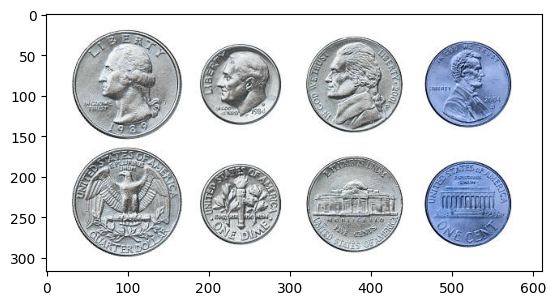

In [6]:
plt.imshow(im)

This looks weird. A penny is copper coated zinc and copper has a brownish-orange color. Something is wrong. As competent data scientists, what should we do? We read the documentation 😁

`cv2.imread()` [documentation](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) says:

> In the case of color images, the decoded images will have the channels stored in B G R order.

`plt.imshow()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) says:

> (M, N, 3): an image with RGB values (0-1 float or 0-255 int).

This means OpenCV reads color channels in BGR order whereas matplotlib uses RGB ordering. We need to convert BGR to RGB before using `plt.imshow()`. We can do this with numpy as follows:

```python
im = im[:, :, [2, 1, 0]]
```

Converting colors from one space to another is so common that OpenCV has a method for that called `cvtColor()`. Let's see how this works for this conversion BGR -> RGB:


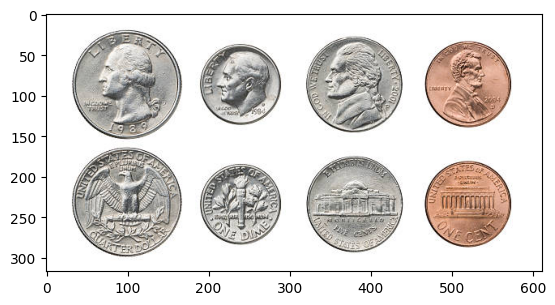

In [7]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

Now this looks better! OpenCV has its own function to display images `cv2.imshow()`. But instead of displaying the image inside the notebook, it opens an external window. Check its documentation [here](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563). Therefore we will use matplotlib to display images.

Let's look at another conversion: RGB -> grayscale. In image processing, grayscale is commonly used because many processing techniques do not need color.

In [8]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.imshow('IMG', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
im.shape

(317, 612)

As you can see, channel axis just disappeared. Notice that (317, 612, 1) could also be a grayscale image shape. You could also read an image as grayscale as follows:

In [10]:
im = cv2.imread('images/coins.jpeg', 0) # 0 flag
im.shape

(317, 612)

Now let's display it:

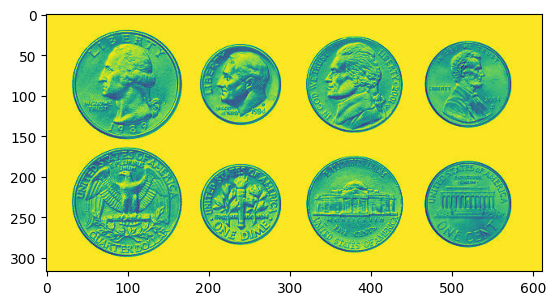

In [11]:
plt.imshow(im)

I'm color blind but even I can see some color here, it is not grayscale. So what is going on? By reading the documentation, we learn that `plt.imshow()` method has a `cmap` parameter and it has a default color map called `viridis`.

>cmap: Colormap, default: 'viridis'\
The Colormap instance or registered colormap name used to map scalar data to colors.\
This parameter is ignored if X is RGB(A).

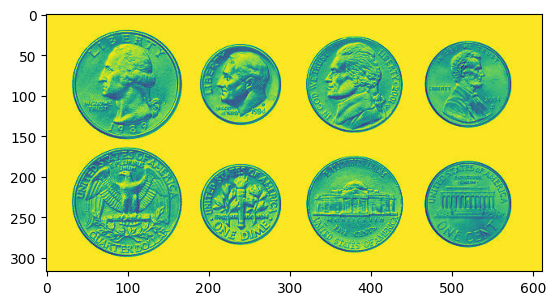

In [12]:
plt.imshow(im, cmap='viridis')

let's use the color map suitable for grayscale images:

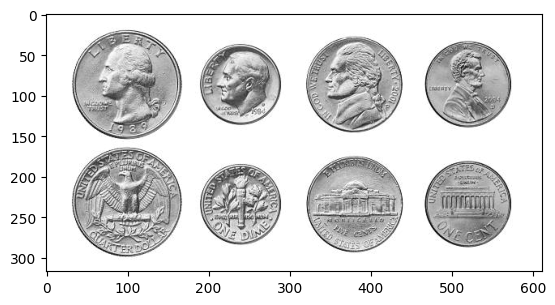

In [13]:
plt.imshow(im, cmap='gray')

take a look at all the colormaps in matplotlib from [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

The final operation I would like to show you before finishing this section is to how to save an image. We can save the grayscale image as follows:

In [14]:
cv2.imwrite('images/im_gray.jpg', im)

True

**Exercise 1.2**

- Read any RGB image from your computer.
- Display it.
- Convert it to grayscale.
- Display it again.
- Save it.

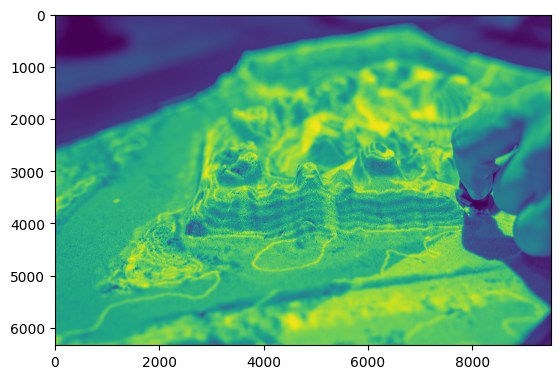

In [15]:
img = cv2.imread('images/2025_Pictures_fort-12.jpg', 0)
plt.imshow(img)

True

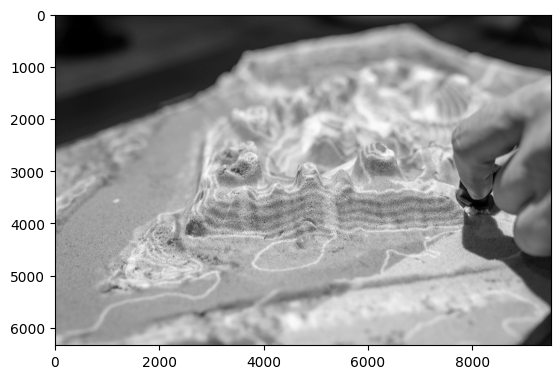

In [16]:
plt.imshow(img, cmap='gray')
cv2.imwrite('images/2025_Pictures_fort-12_gray.jpg', im)

## 2. What is a digital image?

An image is a visual representation or depiction of objects, scenes, or information, typically composed of patterns of varying light and color, that can be either analog or digital in nature. In computer vision, we work with digital images.

When we zoom into a digital image, we see square regions with a single color. These are the building blocks an digital image - pixels. The word pixel is a combination of pix (from "pictures", shortened to "pics") and el (for "element").

Let's zoom into the eagle on one of the coins:

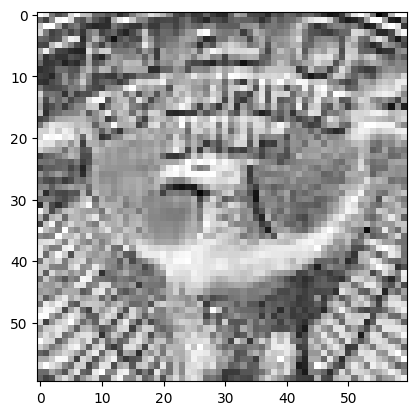

In [17]:
im = cv2.imread('images/coins.jpeg', 0)
zoomed_im = im[170:230, 70:130]
plt.imshow(zoomed_im, cmap='gray')

Let's zoom even more to the head of the eagle:

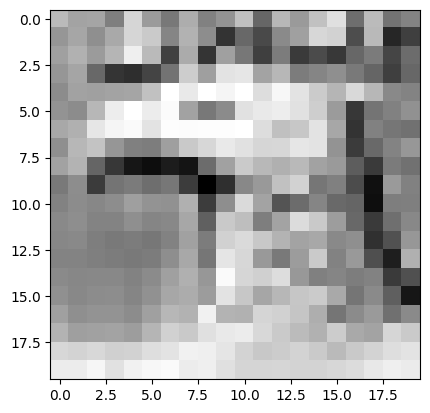

In [18]:
zoomed_im = im[190:210, 88:108]
plt.imshow(zoomed_im, cmap='gray')

Each square is a pixel. In a grayscale image, each pixel has a value between 0 (black) and 255 (white). The values in between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter. Let's display pixel values on the image:

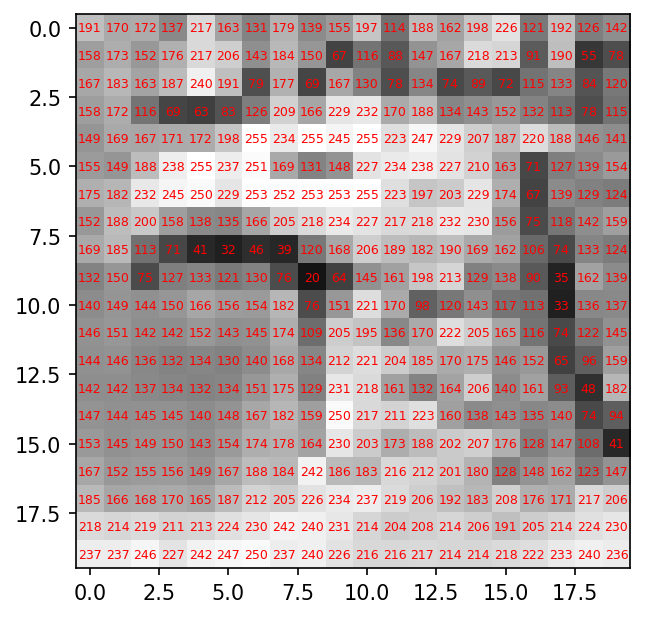

In [19]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(zoomed_im, cmap='gray', vmin=0, vmax=255)

for i in range(zoomed_im.shape[0]):
    for j in range(zoomed_im.shape[1]):
        ax.text(j, i, str(zoomed_im[i, j]), color='r', ha='center', va='center', size=6)

As you know a binary digit (bit) has two possible values 0 or 1. If you have 2 bits, you can represent 4 numbers: 00, 01, 10, 11. With n bits you can represent $2^n$ numbers. With 8 bits, you can represent $2^8=256$ numbers which means we can represent a pixel value with 8 bits. The number of bits used to define a pixel is called _bit depth_. You can encounter 16-bit or 24-bit images in some applications. The greater the bit depth, the greater the number of tones (grayscale or color) that can be represented.

This is why the image data type is `uint8`:

In [20]:
im.dtype

dtype('uint8')

**Important note**

You need to keep in mind the following when using `plt.imshow()` on grayscale images.

Let's create and display a very small image:

In [21]:
four_px_image = np.array([[100, 110],
                          [130, 150]], dtype='uint8')

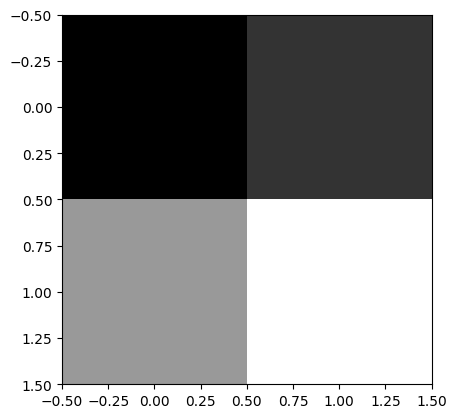

In [22]:
plt.imshow(four_px_image, cmap='gray')

Wait, what? 🤯🤨😵 How can a pixel value of 100 be black and 150 be white? Let's check the documentation of `plt.imshow()`. It turns out, there are parameters called `vmin` and `vmax`:

>When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers. _By default, the colormap covers the complete value range of the supplied data_. This parameter is ignored if X is RGB(A).

It seems like colormap by default finds the minimum and maximum pixel values and sets them as black and white respectively. And this does not happen for RGB images, only for grayscale. This means we need to supply vmin=0 and vmax=255 to ensure true shades of gray.


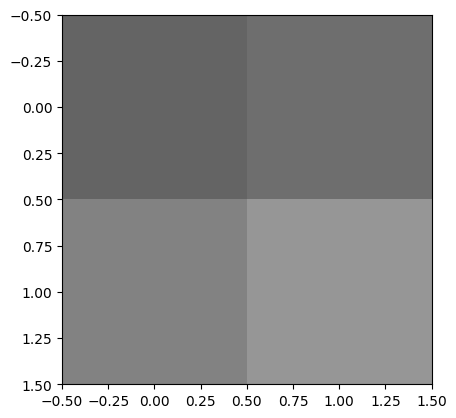

In [23]:
plt.imshow(four_px_image, cmap='gray', vmin=0, vmax=255)

this looks better 🙂

**Exercise 1.3**

Calculate the average and standard deviation of pixel values in the grayscale image `im`.

Expected answer
- Average = 212.78
- Standard deviation = 57.61

What does average pixel intensity being low/high would mean? What does standard deviation of pixel intensity being low/high would mean?

In [24]:
im = cv2.imread('images/coins.jpeg', 0)
mean = im.mean()
std = im.std()
print(f"Std = {std:.2f}")
print(f"Mean = {mean:.2f}")

Std = 57.61
Mean = 212.78


## 3. Color models

The most common way to represent color pixels is the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model). Each color pixel is represented by 3 channels, Red, Green and Blue. Each channel has a value between 0 and 255. Combining these 3 channels gives us a color in the RGB color space.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Venn_diagram_rgb.svg/1024px-Venn_diagram_rgb.svg.png" width="300"/>

Here are some example colors, represented as RGB tuples:

|RGB|Color|
|--|--|
|(0, 0, 0)| Black|
|(255, 255, 255)| White|
|(255, 0, 0)| Red|
|(0, 255, 0)| Green|
|(0, 0, 255)| Blue|
|(128, 128, 0)| Olive|
|(255, 255, 0)| Yellow|

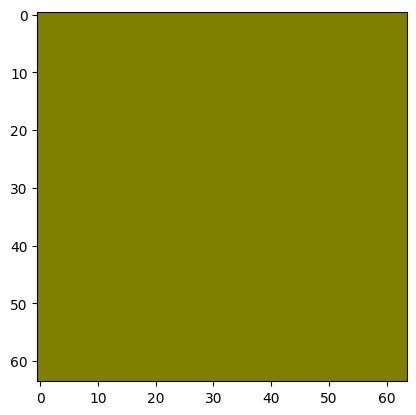

In [26]:
# Let's create an RGB image (64, 64, 3) where every pixel has the color olive.
r = np.ones((64, 64), dtype = 'uint8') * 128
g = np.ones((64, 64), dtype = 'uint8') * 128
b = np.zeros((64, 64), dtype = 'uint8')

im_olive = np.stack((r, g, b), axis=2)

plt.imshow(im_olive)

The other color spaces you will encounter are CMYK (Cyan, Magenta, Yellow, Black) and HSV (Hue, Saturation, Value). It is not easy to change the saturation of an image in RGB representation whereas it is very easy when you use the HSV representation.

**Exercise 1.4**

Create the (64, 64, 3) image below. Colored regions are (32, 32, 3) squares.

<img src='images/rgb_exercise.png'/>

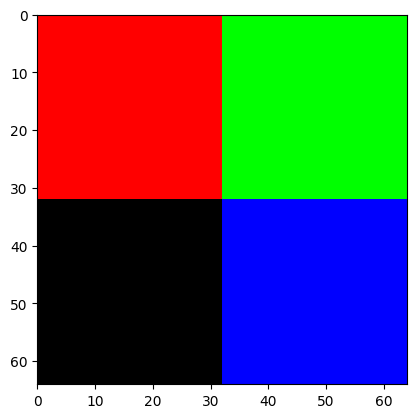

In [42]:
# red, green, black, blues colors
red = (255, 0, 0) # r, g, b
green = (0, 255, 0)
black = (0, 0, 0)
blue = (0, 0, 255)

four_px_img = np.array([[red, green],
                          [black, blue]], dtype='uint8')

plt.imshow(four_px_img, extent=[0, 64, 64,0])
plt.xlim(0, 64)
plt.ylim(64, 0)
plt.show()

### 4. Resolution

What is resolution?

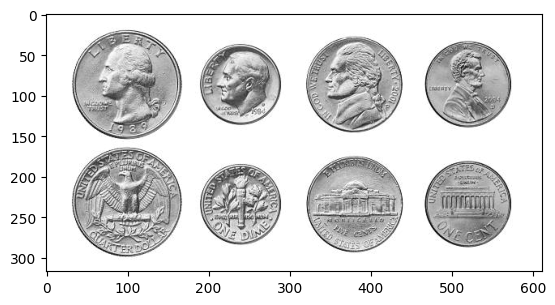

In [35]:
plt.imshow(im, cmap='gray')

In [36]:
im.shape[0] * im.shape[1]

194004

this image contains 194,004 pixels.

**Image resolution** is the level of detail an image holds, it is described in many different ways. One way is to count the number of pixels in an image. A 2 megapixel camera captures 2 million pixels in a single image.

Another metric to measure resolution is pixel per inch (PPI). It is the number of pixels in one inch. But to calculate PPI we need to know an actual distance on the image. Luckily, the image contains US coins, and their sizes are standardized. Let's first find the diameter of the penny in pixels. Let's do this manually for now, later we will see the image processing techniques to automate measurements.

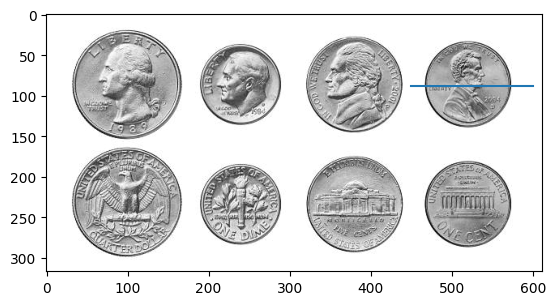

In [43]:
# Let's find a line that cuts the penny in half
plt.imshow(im, cmap='gray')
plt.plot([450, 600], [88, 88])

and plot the cross section:

Text(0.5, 0, 'Pixel location on the blue line')

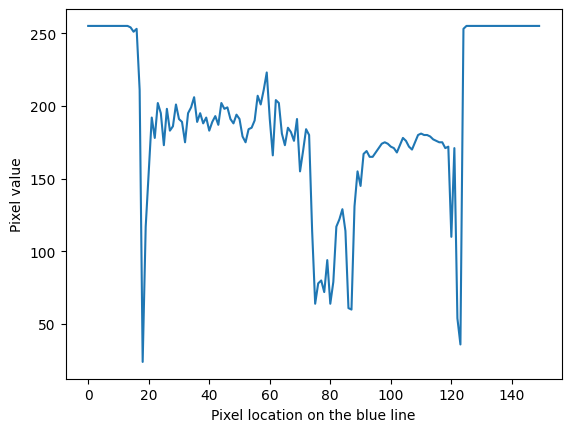

In [44]:
plt.plot(im[88, 450:600])
plt.ylabel('Pixel value')
plt.xlabel('Pixel location on the blue line')

In [45]:
# Here are the pixel values of the pixels on the blue line
blue_line = im[88, 450:600]
blue_line

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 254, 251, 253, 211,  24, 117, 154, 192, 178, 202, 195, 173,
       198, 183, 186, 201, 191, 189, 175, 195, 199, 206, 189, 195, 188,
       192, 183, 189, 193, 187, 202, 198, 199, 191, 188, 194, 191, 179,
       175, 184, 185, 190, 207, 201, 211, 223, 191, 166, 204, 202, 181,
       173, 185, 182, 176, 191, 155, 169, 184, 180, 114,  64,  78,  80,
        72,  94,  64,  79, 117, 122, 129, 114,  61,  60, 131, 155, 145,
       167, 169, 165, 165, 168, 171, 174, 175, 174, 172, 171, 168, 173,
       178, 176, 172, 170, 175, 180, 181, 180, 180, 179, 177, 176, 175,
       175, 171, 172, 110, 171,  54,  36, 253, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255], dtype=uint8)

We can make the following assumption: `blue_line` pixels whose values are not 255 belong to the coin. In that case, the number of non-255 pixels will give us the diameter of one cent in terms of pixels.

**Exercise 1.5**

Find the diameter of the coin by counting the non-255 pixels on the `blue_line`. Expected result is 111 px.

In [51]:
# YOUR CODE HERE
d_cent_px = len(blue_line[blue_line < 255])
d_cent_px

111

In [50]:
# When you solve the exercise above you can remove this cell
if d_cent_px is None:
    d_cent_px = 111

The diameter of a cent is 0.750 inches. Specs here:

https://www.usmint.gov/learn/coin-and-medal-programs/coin-specifications

**Exercise 1.6**

Calculate the PPI. Expected answer is 148 ppi.

In [55]:
# YOUR CODE HERE
d_cent_inch = 0.750 # inch
ppi = d_cent_px / d_cent_inch
ppi

148.0

We will cover measuring objects in detail later. Not every image has standard objects that we can use readily. This is why we have scale bars, especially in microscopy and maps. Here is a scanning electron microscope (SEM) image with 100 µm scale bar.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Pos.tif/lossy-page1-1280px-Pos.tif.jpg' width=400/>

### 5. Image Coordinates

In geometry, a Cartesian coordinate system in a plane is a coordinate system that specifies each point uniquely by a pair of real numbers called coordinates, which are the signed distances to the point from two fixed perpendicular oriented lines, called coordinate lines, coordinate axes or just axes (plural of axis) of the system. The point where they meet is called the origin and has (0, 0) as coordinates. You can see how 4 example points are represented by coordinates.

<style>
    .white {
        background-color: #FFFFFF;
    }
</style>

<div class="white">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Cartesian-coordinate-system.svg/1024px-Cartesian-coordinate-system.svg.png" width=300/>
</div>

We can use the Cartesian coordinate system to represent pixel positions. In image processing, however, by convention y-axis is oriented downwards while x-axis stays the same. This is why, when we display images with `plt.imshow()` x-axis values increase from left to right, whereas y-axis values increase from top to bottom.

In [ ]:
plt.imshow(im, cmap='gray')

According to this convention, top left pixel is the origin (0, 0). Let's plot 3 points:

In [ ]:
plt.imshow(im, cmap='gray')
plt.scatter(x=0, y=0, c='red', s=100) # (0,0)
plt.scatter(x=0, y=80, c='blue', s=100) # (0, 80)
plt.scatter(x=380, y=80, c='green', s=100) # (380, 80)

**Exercise 1.7**

What is the center (x, y) of the coin on the bottom row, second from the left (one dime)?

In [ ]:
# YOUR CODE HERE
x = None
y = None
plt.imshow(im, cmap='gray')
plt.scatter(x, y, c='green', s=100)

**Exercise 1.8**

What is the value of the pixel (380, 80)? The expected answer is 186. Think about the relationship between x, y and row, column.

In [ ]:
# YOUR CODE HERE

**Exercise 1.9**

What is the Euclidean distance between the points (0, 0) and (380, 80)? The expected answer is 388.33 px.

In [ ]:
# YOUR CODE HERE

**Exercise 1.10**

Display the coin on the top left by slicing the `im`.

In [ ]:
# YOUR CODE HERE

## 4. Drawing

Drawing lines, boxes, circles on images is indispensible in CV. After all, object detection is drawing bounding boxes around objects 🖍

<img src='https://i.imgur.com/wdrAWUI.png' width=800\>

[J. Redmon et al, _You only look once: Unified, real-time object detection_, 2016](https://arxiv.org/abs/1506.02640)

Let's start by drawing a line:

`cv2.line(image, start_point, end_point, color, thickness)`

Remember, default color space in OpenCV is... BGR which means if you want to draw a red line you pass (0, 0, 255) as the color.

In [ ]:
# Image diagonal
im = cv2.imread('images/coins.jpeg')
im_with_line = cv2.line(im, (0, 0), (im.shape[1], im.shape[0]), (0, 0, 255), 5)
im_with_line = cv2.cvtColor(im_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(im_with_line)

Drawing your first bounding box 🥹

`cv2.rectangle(image, start_point, end_point, color, thickness)`

- start_point: coordinates of the top left corner
- end_point: coordinates of the bottom right corner

In [ ]:
# Bounding box
im = cv2.imread('images/coins.jpeg')
im_with_rectangle = cv2.rectangle(im, (190, 185), (289, 283), (0, 0, 255), 2)
im_with_rectangle = cv2.cvtColor(im_with_rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(im_with_rectangle)

In [ ]:
# If you want to fill the object set thickness to -1
im = cv2.imread('images/coins.jpeg')
im_with_rectangle = cv2.rectangle(im, (190, 185), (289, 283), (0, 0, 255), -1)
im_with_rectangle = cv2.cvtColor(im_with_rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(im_with_rectangle)

**Exercise 1.11**

Draw a bounding box around another coin.

In [ ]:
# YOUR CODE HERE

**Exercise 1.12**

Given the following:

`cv2.circle(image, center_coordinates, radius, color, thickness)`

draw a circle around any coin.

In [ ]:
# YOUR CODE HERE

## 5. scikit-image

So far we have covered image basics using `OpenCV`. There is another image processing library called `scikit-image`. You need to learn both because they have advantages over each other. Since you already know image basics, we will cover the syntax of `scikit-image` in comparison with `OpenCV`.

In [ ]:
import skimage
im = skimage.io.imread('images/coins.jpeg')

In [ ]:
type(im), im.dtype

skimage works with uint8 numpy arrays too. But the default color space is RGB:

In [ ]:
plt.imshow(im)

In [ ]:
# read image as gray
im = skimage.io.imread('images/coins.jpeg', as_gray=True)

In [ ]:
# but when you read it as gray this happens
print(f'Pixel data type is {im.dtype} and values are between {np.min(im)} and {np.max(im)}')

you can convert this to 0-255 integers as follows:

In [ ]:
im = im * 255
im = im.astype('uint8')
print(f'Pixel data type is {im.dtype} and values are between {np.min(im)} and {np.max(im)}')

In [ ]:
plt.imshow(im, cmap='gray')

Drawing with `scikit-image` is also little different than `OpenCV`. Instead of (x, y) it uses (row, column) for the coordinates which means (y, x).

```
rr, cc = skimage.draw.rectangle_perimeter(
    start=(top_left_y, top_left_x),
    end=(bottom_right_y, bottom_right_x),
    shape=image.shape)
```

another difference is `OpenCV` drawing methods returned the output image. `scikit-image` returns the coordinates. Therefore, we need to set the pixels defined by those coordinates into the color we want.

In [ ]:
rr, cc = skimage.draw.rectangle_perimeter(start=(185, 190), end=(283, 289), shape=im.shape)
im[rr, cc] = 0  # Set rectangle pixels to black
plt.imshow(im, cmap='gray')

you can find all the shapes you can draw here:

https://scikit-image.org/docs/stable/api/skimage.draw.html#module-skimage.draw

**Exercise 1.13**

Check the available modules and the methods in scikit-image:

https://scikit-image.org/docs/stable/api/api.html

## 6. Sample images

Both OpenCV and scikit-image has sample images that are used to demonstrate CV operations.

OpenCV samples are here: https://github.com/opencv/opencv/tree/master/samples/data

scikit-image sample images are easier to access: https://scikit-image.org/docs/stable/api/skimage.data.html

In [ ]:
sample_im = skimage.data.astronaut()
plt.imshow(sample_im)

In [ ]:
plt.imshow(skimage.data.rocket())

In [ ]:
plt.imshow(skimage.data.cell(), cmap='gray')

**Exercise 1.14**

- Go to here: https://scikit-image.org/docs/stable/api/skimage.data.html#
- Read how `skimage.data.binary_blobs()` function works
- Generate binary blobs using `skimage.data.binary_blobs()`

In [ ]:
# YOUR CODE HERE

## 7. Image transformations

In linear algebra, the transpose of a matrix switches rows and columns:

In [ ]:
arr = np.array([[1, 2],
                [3, 4]])
arr

In [ ]:
arr.T

As we have seen images are matrices. What would happen if we transpose an image?

In [ ]:
im = cv2.imread('images/coins.jpeg', 0)
im.shape

In [ ]:
transposed_im = im.T
transposed_im.shape

In [ ]:
plt.imshow(transposed_im, cmap='gray')

The image is rotated 90 degrees counter clock wise. What if we would like to rotate an image 10 degrees, shift an image, obtain the mirror image, or rescale an image? All of these can be defined as matrix operations similar to the transpose operation.

Read more here:
- https://en.wikipedia.org/wiki/Transformation_matrix
- https://en.wikipedia.org/wiki/Translation_(geometry)
- https://en.wikipedia.org/wiki/Affine_transformation
- https://en.wikipedia.org/wiki/Homography

These transformation are already implemented in `OpenCV` and `scikit-image`.


Let's see how you can rotate an image with `OpenCV`. First step is to calculate the transformation matrix and the second step is to apply this transformation matrix to the image:

```
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
```
- center: center of rotation (x, y)
- angle: rotation angle in degrees (counter-clockwise)
- scale: scale factor

The `cv2.warpAffine()` function in OpenCV is used to apply an affine transformation to an image, which can include operations like translation, rotation, scaling, and shearing. Here's an explanation of its main parameters:
```
rotated_image = cv2.warpAffine(src, M, dsize)
```
- src: image to be transformed
- M: 2x3 transformation matrix
- dsize: size of the output (width, height)


In [ ]:
h = im.shape[0]
w = im.shape[1]

center = (w/2, h/2)

In [ ]:
angle = 10
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(im, rotation_matrix, (w, h))
plt.imshow(rotated_image, cmap='gray')


In [ ]:
# and with skimage
from skimage.transform import rotate
rotated_image = rotate(im, angle)
plt.imshow(rotated_image, cmap='gray')

You might have noticed that when we rotated the image, some parts of the image fell beyond the image borders. We can resize or pad the original image to prevent that.

In [ ]:
rotated_image = rotate(im, angle, resize=True)
plt.imshow(rotated_image, cmap='gray')

**Exercise 1.15**

Resize the coins image using `OpenCV` and `scikit-image` to size (317, 317)

In [ ]:
# YOUR CODE HERE

## 8. Histograms

Image histograms show the distribution of pixel intensities (i.e. values) in an image. In simpler terms, they tell you how many pixels have each possible brightness level. Bins in image histograms represent intervals for pixel values. In a histogram with 256 bins, each bin corresponds to a single pixel value. For 32 bins, each bin corresponds to 8 pixel values next to each other.

You can compute histograms using numpy, OpenCV etc. Let's use `plt.hist()` to compute and plot the histogram of the coins image. It expects a 1-D array, therefore `im` needs to be reshaped.

In [ ]:
n, bins, patches = plt.hist(im.reshape(-1,), bins=32)

From the histogram we can see that most of the pixels are white (background) and there are some pixels that peak around 175 which must belong to the coins. We can access each bin size and value from `n` and `bins`:

In [ ]:
n # number of pixels in each bin

In [ ]:
bins # bin edges

In [ ]:
print(f'There are {n[0]:.0f} pixels that has a value between {bins[0]:.0f}-{bins[1]:.0f}')
print(f'There are {n[-1]:.0f} pixels that has a value between {bins[-2]:.0f}-{bins[-1]:.0f}')

**Exercise 1.16**

Plot the histogram of the cell image.

In [ ]:
im_cell = skimage.data.cell()
plt.imshow(im_cell, cmap='gray')

In [ ]:
# YOUR CODE HERE

Interpret the histogram, i.e. how many peaks do you see? which peak(s) represents the cell and which peak(s) represents the background?

## 9. Binary Image

A binary image is a digital image composed of only two distinct pixel values, typically representing objects as foreground and background regions. Binary images are very common in image processing and some image processing methods only work on binary images. Let's see an example using our coins image.

We will plot the same histogram but this time with a threshold of 230

In [ ]:
n, bins, patches = plt.hist(im.reshape(-1,), bins=32)
plt.axvline(x=230, color='r', linestyle='--')

what if we set all pixel values above a threshold of 230 to `True` and rest to `False`?

In [ ]:
binary_im = im > 230
plt.imshow(binary_im, cmap='gray')

We obtained a binary image. In other words, the pixels values have two possible values, in this case True or False.

In [ ]:
np.unique(binary_im)

the values does not matter we can have binary images with 0 or 1:

In [ ]:
binary_im = binary_im * 1
binary_im = binary_im.astype('uint8')
np.unique(binary_im)

with 0 or 255:

In [ ]:
binary_im = binary_im * 255
np.unique(binary_im)

what is important is a binary image pixel can have only two values. Let's zoom into a coin edge and see what happened:

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im[70:100, 20:50], cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Raw image')
ax[1].imshow(binary_im[70:100, 20:50], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Binary image')

since most of the background pixel values are above 230, they are set to 255 in the binary image. And since most of the coin pixel values are below 230, they are set to 0 in the binary image.

What we just did is called thresholding which can help use separate background and the foreground. We will cover thresholding in the next notebook in more detail.

**Exercise 1.17**

Considering the image and the histogram from Exercise 1.16 select an appropriate threshold to obtain the following binary image:

<img src='images/cell_exercise.png'>

In [ ]:
im_cell = skimage.data.cell()
plt.imshow(im_cell, cmap='gray')

In [ ]:
# YOUR CODE HERE

## 10. Combining Images

When working with images, there will be applications which require combining images. This can be in the form of adding/subtracting images from each other (e.g. watermarks) or using one image as a mask on the other image to focus on a region. We can use _image arithmetic_ and _bitwise operations_ to combine images.

Let's start with a simple example: what happens if we add 100 to all pixels values:

In [ ]:
im = cv2.imread('images/coins.jpeg', 0)
im = im + 100

In [ ]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

what kind of sorcery is this? Let's consider the white background pixels (255). In normal arithmetic 255 + 100 = 355. But pixel values are between 0 - 255, and 355 is not a valid pixel intensity. NumPy is doing modular arithmetic to handle values outside of 0-255.

In [ ]:
np.mod(355, 256)

In [ ]:
# Let's check the top left corner of the image
im[0:10, 0:10]

Now let's do the same with OpenCV and see if we get the same result (hint: we won't 🥲)

In [ ]:
im = cv2.imread('images/coins.jpeg', 0)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

In [ ]:
# add 100 to all pixels with OpenCV
im = cv2.add(im, 100)

In [ ]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

now the behaviour is totally different. The image looks washed out and brighter. OpenCV is clipping values instead of using the modular arithmetic. Let's look closer:

In [ ]:
example_image = np.array([[255, 200],
                          [0, 150]], dtype='uint8')
example_image

In [ ]:
# numbers higher than 255 are clipped to 255
cv2.add(example_image, 100)

Now let's take a look at the bitwise operations AND, OR, XOR, NOT. To do that let's first create two binary images.

In [ ]:
im_rectangle = np.zeros((300, 300), dtype = "uint8")
im_rectangle = cv2.rectangle(im_rectangle, (25, 25), (275, 275), 255, -1)

im_circle = np.zeros((300, 300), dtype = "uint8")
im_circle = cv2.circle(im_circle, (150, 150), 150, 255, -1)

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im_rectangle, cmap='gray')
ax[1].imshow(im_circle, cmap='gray')

let's combine these images with bitwise operations:

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(cv2.bitwise_and(im_rectangle, im_circle), cmap='gray') # AND
ax[0].set_title('AND')
ax[1].imshow(cv2.bitwise_or(im_rectangle, im_circle), cmap='gray') # OR
ax[1].set_title('OR')
ax[2].imshow(cv2.bitwise_xor(im_rectangle, im_circle), cmap='gray') # XOR
ax[2].set_title('XOR')

Examine these 3 outputs in detail to make sure you understand how AND OR and XOR operations work.

We can also invert pixel values using NOT:

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.bitwise_not(im_circle), cmap='gray')
ax[1].imshow(cv2.bitwise_not(im_rectangle), cmap='gray')

In [ ]:
im = cv2.imread('images/coins.jpeg', 0)
plt.imshow(cv2.bitwise_not(im), cmap='gray', vmin=0, vmax=255) # NOT coins

one of the key operations we can do with bitwise operations is called masking.

Masking in image processing involves isolating a specific region or area of interest within an image while ignoring the rest. A mask, typically a binary image, is used to define the region to be preserved, with white pixels representing the region of interest and black pixels representing areas to be masked or ignored. This technique is commonly employed for segmenting objects in images, enabling selective processing and analysis of specific image regions.

In [ ]:
im = cv2.imread('images/coins.jpeg', 0)

In [ ]:
# Creating a mask
mask = np.zeros_like(im)
mask = cv2.circle(mask, (99, 86), 67, 255, -1)
plt.imshow(mask, cmap='gray')

In [ ]:
# Masking the image
masked_image = cv2.bitwise_and(im, mask)
plt.imshow(masked_image, cmap='gray')

we can do masking with numpy as well:

In [ ]:
# create a mask with 0s and 1s
mask = mask/255
mask = mask.astype('uint8')

In [ ]:
# multiply that with the image
plt.imshow(im * mask, cmap='gray')

**Exercise 1.18**

Apply the mask you obtained in Exercise 1.17 to the cell image and extract the cell. Expected output:

<img src='images/cell_mask_exercise.png'>

In [ ]:
im_cell = skimage.data.cell()
plt.imshow(im_cell, cmap='gray')

In [ ]:
# YOUR CODE HERE